In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 25  # fontsize of the x any y labels

# Aufgabe 21: Kanalkapazität

Die Problemstellung in Aufgabe 21 ist das Originalbeispiel aus Shannons Veröffentlichung:  
[Claude E. Shannon: A mathematical theory of communication, 1948, S.25ff](http://worrydream.com/refs/Shannon%20-%20A%20Mathematical%20Theory%20of%20Communication.pdf)  
Dieses Notebook enthält die interaktive Visualisierung des Ergebnisses. Es sollte, wenn möglich, heruntergeladen und durch einen eigenen jupyter-Server ausgeführt werden. In diesem Fall wird die Variable `online` auf `False` gesetzt und im 3D-Plot kann gedreht und gezoomt werden.

In [2]:
online = True # Setzen: True fuer Webansicht, False fuer interaktive Sicht

Eine Nachrichtenquelle sendet drei Symbole $1$, $2$ und $3$ mit den entsprechenden Auftrittswahrscheinlichkeiten aus. Das Symbol $1$ wird fehlerfrei übertragen, während $2$ und $3$ nur mit einer Wahrscheinlichkeit $1{-}p$ richtig empfangen werden. Im folgenden Bild sind die Verhältnisse dargestellt:

![Kanal](figures/A21/Kanal.png)

## 21.1:
Geben sie die Tabelle der bedingten Wahrscheinlichkeiten an.

Die Tabelle lässt sich direkt aus der Abbildung ablesen:

|$\mathrm{Pr}_{Y \mid X}(y {\mid} x)$|$y=1$     |$y=2$     |$y=3$     |
|:-----------------------------------|:--------:|:--------:|:--------:|
|     $x = 1$                        | $1$      | $0$      | $0$      |
|     $x = 2$                        | $0$      | $1{-}p$  | $p$      |
|     $x = 3$                        | $0$      | $p$      | $1{-}p$  |

## 21.2:
Ermitteln sie die über den Kanal übertragene Information.

Zunächst müssen mit $\mathrm{Pr}_X(x_i) = q_i$ die Verbundwahrscheinlichkeit

\begin{align}
    \mathrm{Pr}_{X,Y}(x,y) = \mathrm{Pr}_{Y|X}(y|x) \cdot \mathrm{Pr}_X(x)
\end{align}

Und die Marginalwahrscheinlichkeit für $Y$

\begin{align}
    \mathrm{Pr}_Y(y) = \sum_{x \in \{0,1,2\}} \mathrm{Pr}_{X,Y}(x,y)
\end{align}

berechnet werden. Damit ergibt sich folgende Tabelle:

|  $\mathrm{Pr}_{Y,X}(y,x)$  |$y=1$  |$y=2$          |$y=3$          |$\mathrm{Pr}_{X}(x)$ |
|:---------------------------|:-----:|:-------------:|:-------------:|:--------------------|
|     $x = 1$                | $q_1$ | $0$           | $0$           | $q_1$               |
|     $x = 2$                | $0$   | $(1{-}p)q_2$  | $p{\cdot}q_2$ | $q_2$               |
|     $x = 3$                | $0$   | $p{\cdot}q_2$ | $(1{-}p)q_2$  | $q_2$               |
|$\mathrm{Pr}_{Y}(y)$        |$q_1$  |$q_2$          |$q_2$          | $1$                 |

Die Transinformation lässt sich nun folgendermaßen berechnen:

\begin{align}
    \mathrm{I}(X;Y) = \mathrm{H}(X) - \mathrm{H}(X|Y)
\end{align}

#### 1. Quellentropie $\mathrm{H}(X)$:

\begin{align}
    \mathrm{H}(X) = -\sum_{x in \Omega_X} \log_2 \left(\mathrm{Pr}_X(x) \right) \mathrm{Pr}_X(x) = -\left( q_1\log_2(q_1) + 2 \cdot q_2\log_2(q_2) \right)
\end{align}

#### 2. Verlustentropie (Äquivokation) $\mathrm{H}(X|Y)$:
Es ist in diesem Fall geschickter, die Äquivokation ohne Zerlegung zu berechnen:

\begin{align}
    \mathrm{H}(X|Y)
       &= \mathrm{E} \left[ -\log_2\left(\mathrm{Pr}_{X|Y}(X|Y) \right) \right] \\
       &= \mathrm{E} \left[ -\log_2\left( \frac{\mathrm{Pr}_{X,Y}(X,Y)}{\mathrm{Pr}_Y(Y)} \right) \right] \\
       &= -\left( q_1 \cdot \log_2\left(\frac{q_1}{q_1} \right) + 2 \cdot (1{-}p)q_2 \cdot \log_2\left(\frac{(1{-}p)q_2}{q_2} \right) + 2\cdot p\,q_2 \cdot \log_2\left(\frac{p\,q_2 }{q_2} \right) \right) \\
       &= -2\,q_2\, \underbrace{\left[ p \log_2(p) + (1{-}p) \log_2(1{-}p)  \right]}_{:= u(p)} \\[0.25em]
       &= -2q_2\,u(p)
\end{align}

Die Funktion $u(p)$ hängt nur von $p$, also vom **gegebenen** Kanal ab. Daran lässt sich aus informationstheoretischer Sichtweise nichts ändern; bezgl. der Symbolwahrscheinlichkeiten ist der Term **konstant**.  
Damit ergibt sich als Transinformation:

\begin{align}
    \mathrm{I}(X;Y) &= -\left( q_1\log_2(q_1) + 2 \cdot q_2\log_2(q_2) \right) - (-2q_2\,u(p)) \\
        &= -q_1\log_2(q_1) +2\,q_2\,\left[u(p) - \log_2(q_2) \right]
\end{align}

## Definitionen der Zwischengrößen

### Punktweiser Informationsgehalt

\begin{align}
    \mathrm{I}(p) = -\log_2(p) \quad \in [0, 1]
\end{align}

Diese Funktion weist einer gegebenen Wahrscheinlichkeit ihren Informationsgehalt zu. Für den Code wird zusätzlich mit der Wahrscheinlichkeit gewichtet, um eine numerisch stabile Version zu erhalten:

In [3]:
def weighted_I(p):
    # Diese Definition ist numerisch stabil
    return np.piecewise(p, [p != 0, p == 0], 
                        [lambda p: -p*np.log2(p), lambda p: 0])

### Negative Entropie einer binären Zufalsvariable
Für eine binäre Zufallsvariable $N$ mit der Wahrscheinlichkeit $\mathrm{Pr}_N(1) = p$ (zum Beispiel der Fehlerwahrscheinlichkeit auf einem Kommunikationskanal) wird hiermit die negative Entropie angegeben:

\begin{align}
    \mathrm{H}(N) &= -\sum_{n=0}^1 \log_2\left(\mathrm{Pr}_N(n)\right) \mathrm{Pr}_N(n) &&= -p \log_2(p) - (1{-}p) \log_2(1{-}p) \\
    \Rightarrow u(p) &= -\mathrm{H}(N) &&= \ \ p \log_2(p) + (1{-}p) \log_2(1{-}p) \quad \in [-1, 0]
\end{align}

In [4]:
def u(p):
    return -weighted_I(p) - weighted_I(1-p)

Damit können im Folgenden einige Terme zusammengefasst werden. Der Zusammenhang zwischen $\mathrm{H}(N)$ und $p$ ist im folgenden Diagramm dargestellt:

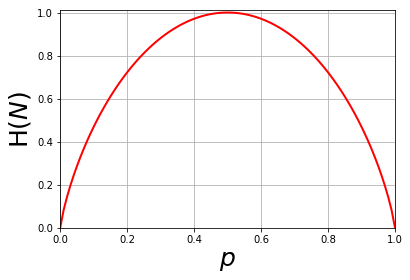

In [5]:
%matplotlib inline
p1d = np.linspace(0, 1, 100)
plt.plot(p1d, -u(p1d), 'r')
plt.xlabel(r'$p$')
plt.ylabel(r'$\mathrm{H}(N)$')
plt.xlim((0.0, 1.0))
plt.ylim((0.0, 1.01))
plt.grid(True)

Am Diagramm können einige wichtige Fälle unterschieden werden:

#### Kleine Fehlerwahrscheinlichkeit ($p < \frac{1}{2} \approx 0$):
Fehler treten sehr selten auf und die Unischerheit ist deshalb klein.

#### Große Fehlerwahrscheinlichkeit ($p > \frac{1}{2} \approx 1$):
Fehler treten häufig auf. Da p bekannt ist, kann aber einfach das jeweils andere Symbol als Ergebnis genommen werden. Auch in diesem Fall ist die Unsicherheit sehr klein.

#### Mittlere Fehlerwahrscheinlichkeit ($p \approx \frac{1}{2}$):
Die beiden Symbole können schlecht unterschieden werden und die Unsicherheit ist groß.    
Für $p=1/2$ ist überhaupt keine Übertragung auf dem Teilkanal möglich. In diesem Fall sind Eingang und Ausgang des Kanals statistisch unabhängig. Durch die Kenntnis des Ausganges ist also keinerlei Vorhersage über den Eingang möglich!

## 21.3:
Bestimmen sie die Auftrittswahrscheinlichkeiten $q_1$ und $q_2$ der Quelle so, dass die Transinformation maximal wird.

Durch die Maximierung der Transinformation ergeben sich die optimalen Wahrscheinlichkeiten. Strenggenommen muss eine mehrdimensionale Optimierung (Mit Nebenbedingung $\ q_1 + q_2+ q_3 = 1 $) durchgeführt werden:

\begin{align}
    C_s &= \underset{(q_1, q_2, q_3)^\mathrm{T}}{\mathrm{max}}\left\{I(X,Y)\right\} \\
    \Rightarrow (q_1^{\mathrm{opt}}, q_2^{\mathrm{opt}}, q_3^{\mathrm{opt}})^\mathrm{T} &= \underset{(q_1, q_2, q_3)^\mathrm{T}}{\mathrm{argmax}}\left\{I(X,Y)\right\}
\end{align}

Dies kann jedoch durch umgangen werden:
    
Wegen der Symmetrie zwischen den Symbolen gilt $q_3^{\mathrm{opt}}= q_2^{\mathrm{opt}}$
    
Durch die Beziehung $\quad q_1 = 1 {-} q_2 {-} q_3 \quad $ ist $\quad q_1^{\mathrm{opt}} = 1{-}2 {\cdot} q_2^{\mathrm{opt}} \quad$ festgelegt.

Es reicht also insgesamt

\begin{align}
    q_2^{\mathrm{opt}} = \underset{q_2}{\mathrm{argmax}}\left\{ \mathrm{I}(X,Y) \right\}.
\end{align}

### Transinformation für beliebige Quellwahrscheinlichkeiten
In der Transinformation werden diese Substitutionen ausgenutzt. Es können höchstens drei Symbole unterschieden werden.

Deshalb ist die Transinformation eine Funktion  $\ \mathcal{f}_1:[0,1] \times [0,1] \rightarrow [0, \log_2(3)]$:

\begin{align}
    \mathrm{I}(X; Y) &= -q_1 \log_2(q_1) - 2 q_2 \log_2(q_2) + 2 q_2 u(p) \\
            &= -(1-2 q_2) \log_2(1-2 q_2) - 2 q_2 \log2(q_2) + 2 q_2 u(p) \\
            &= \mathcal{f}_1(p, q_2)
\end{align}

In [6]:
def T(p, q):
    return weighted_I(1-2*q) + 2*weighted_I(q) +2*q*u(p)

Die Optimierung kann durch Ableitung der Transinformation nach $q_2$ erfolgen (da $p$ ja nicht verändert werden kann).

Dazu wird die Beziehung

\begin{align}
    \log_2(x) &= \log_2\left(\mathrm{e}^{\mathrm{ln}(x)}\right) = \log_2(\mathrm{e}) \cdot  \mathrm{ln}(x) \\[1em]
    \Rightarrow \frac{\partial}{\partial x} x \log_2(x) &= 1 \cdot \log_2(x) + x \cdot \log_2(\mathrm{e}) \frac{1}{x} = \log_2(\mathrm{e}) \, (1 + \mathrm{ln}(x))
\end{align}

benutzt (Auf innere Ableitung des Termins im Logarithmus achten!):

\begin{align}
    \frac{\partial }{\partial q_2} \mathrm{I}(X;Y) &\overset{!}{=} 0 \\
    &= \frac{\partial }{\partial q_2} \left( -(1-2 q_2) \log_2(1-2 q_2) - 2 q_2 \log2(q_2) + 2 q_2 u(p)  \right) \\
    &=        -2\cdot \log_2(\mathrm{e})(1 + \mathrm{ln}(q_2)) - \log_2(\mathrm{e})(1 + \mathrm{ln}(1 - 2\,q_2)) \cdot(-2) + 2 u(p) \\
    &= 2 \cdot \left( \log_2(\mathrm{e})(\mathrm{ln}(1 - 2\,q_2) - \mathrm{ln}(q_2))  + u(p) \right) \\
    &= 2 \cdot \left( \log_2\left(\frac{1 - 2\,q_2}{q_2}\right) + u(p) \right) \overset{!}{=} 0
\end{align}

Die Wahrscheinlichkeit für die Symbole $1$ und $2$ ist gleich und **muss** deshalb den Definitionsbereich $q_2 \in \left(0, \frac{1}{2} \right)$ haben (die Ränder sind wegen der verringerten Größe des Alphabets mit Sicherheit nicht optimal).  
Weil die Funktion $\log_2\left(\frac{1}{q_2} - 2 \right)$ auf diesem Bereich **streng monoton fallend** ist und darum um die Ableitung um ihre Nullstelle herum ihr Vorzeichen von positiv nach negativ wechselt, gehört diese Nullstelle zum globalen **Maximum**.

Umstellen ergibt:

\begin{align}
    &&\log_2 \left( \frac{q_2^{\mathrm{opt}}}{1 - 2\,q_2} \right) &= u(p) \\
    &\Rightarrow& \frac{q_2^{\mathrm{opt}}}{1 - 2\,q_2^{\mathrm{opt}}} &=  2^{u(p)} \\
    &\Rightarrow& q_2^{\mathrm{opt}} &= 2^{u(p)}\left(1 - 2\,q_2^{\mathrm{opt}}\right) \\
    &\Leftrightarrow& q_2^{\mathrm{opt}}\left(1+ 2^{u(p)+1}\right) &= 2^{u(p)}\\
    &\Rightarrow& q_2^{\mathrm{opt}} &= \frac{1}{2} \frac{2^{u(p)+1}}{1 + 2^{u(p)+1}}
\end{align}

### Optimale Quellwahrscheinlichkeiten
Das Ergebnis der Maximierung lässt sich als Funktion von $p$ darstellen:

\begin{align}
    q_1^{\mathrm{opt}}(p) &= \frac{1}{1+2^{1+u(p)}} \\
    q_2^{\mathrm{opt}}(p) &= \frac{1}{2} \frac{2^{1+u(p)}}{1+2^{1+u(p)}} \quad = q_3^{\mathrm{opt}}(p)\\
\end{align}

Auch die Nebenbedingung $q_1 + q_2 + q_3 = 1$ wird offensichtlich erfüllt.

In [7]:
def q1(p):
    return 1/(1 + 2**(1 + u(p)) )

def q2(p):
    return 2**u(p)/(1 + 2**(1 + u(p)) )

## 21.4:
Welcher Wert ergibt sich für die Kanalkapazität, wenn $p=0$, $p= \frac{1}{2}$ oder $p=0{,}01$ ist?

### Kanalkapazität
Die Kanalkapazität ist eine eindimensionale Funktion von $p$:

\begin{align}
    C_s &= \underset{q_2}{\max} \left\{ I(X; Y)\right\} \\
        &= \mathcal{f}_1(p, q_2^{\mathrm{opt}}(u(p))) \\
        &= \mathcal{f}_2(p)
\end{align}

In [8]:
def C(p):
    return T(p, q2(p))

## Grafische Darstellung

In [9]:
p1d = np.linspace(0, 1, 100)
q1d = np.linspace(0, 0.5, 50)
u1d = np.linspace(0, 1, 100)

### 3D-Plot der Transinformation

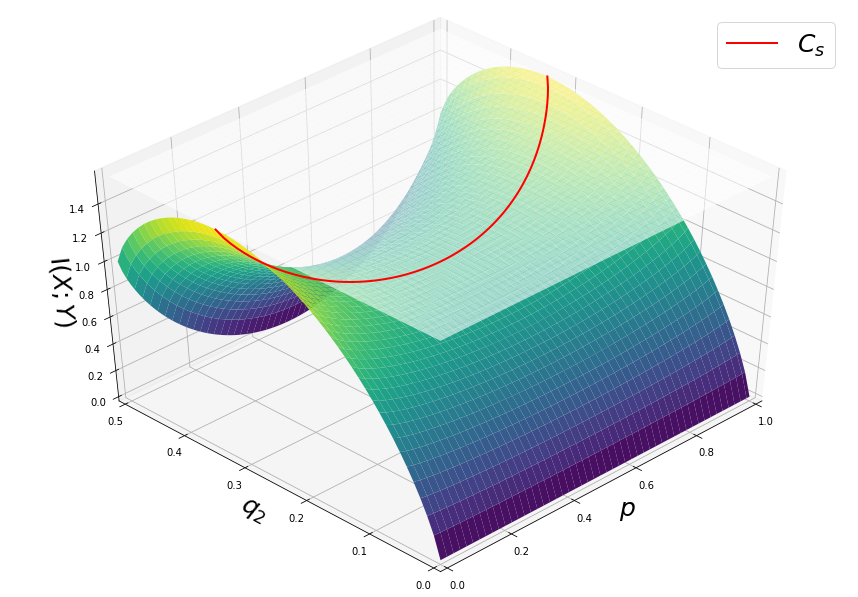

In [10]:
p, q = np.meshgrid(p1d, q1d)
TI = T(p, q)
upper_bound = np.ones_like(p)*np.log2(3)

if(online):
    # Online-Ansicht
    %matplotlib inline
else:
    # Interaktive Ansicht
    %matplotlib qt5

# Allgemeine Einstellungen zum Plot
fig = plt.figure(figsize=(15, 15/np.sqrt(2)))
fig.canvas.set_window_title('Transinformation')
ax = fig.gca(projection='3d')

# Transinformation
surf1 = ax.plot_surface(p, q, TI, cmap='viridis', 
            vmin=np.amin(TI), vmax=np.amax(TI))

#obere Grenze der Transinformation
surf2 = ax.plot_surface(p, q, upper_bound, cmap='gray', 
            vmin=np.amin(TI), vmax=np.amax(TI), alpha=0.6)

# Kanalkapazitaet
line = ax.plot(p1d, q2(p1d), C(p1d), 'r', 
               label= r'$C_s$')

# Achsbeschriftungen
ax.legend(fontsize=25)
ax.grid(True)

ax.set_xlim((0, 1))
ax.invert_xaxis()
ax.set_xlabel(r'$p$', fontsize=25)

ax.set_ylim((0, 0.5))
ax.invert_yaxis()
ax.set_ylabel(r'$q_2$', fontsize=25)

ax.set_zlabel(r'$\mathrm{I}(X;Y)$', fontsize=25)
ax.set_zlim((0, 1.59))
# 3D-Sicht
if online:
    ax.view_init(45, 45)
else:
    ax.view_init(85, 90)

#### Diskussion der Werte von $q_2$:

* Die Informationsfläche ist symmetrisch um $p=\frac{1}{2}$, hat für $q_2$ aber keine solche Symmetrie.   
* Für $q_2 = 0$ steht nur das Symbol $X=1$ mit $q_1=1$ (sicheres Ereignis) zur Verfügung. In diesem Fall wird keine Information übertragen.

* Für $q_2= \frac{1}{2}$ ist $q_1=0$. Verwendet werden also nur $X \in \{2, 3\}$. Der maximal übertragbare Informationsgehalt ist in diesem Fall $\log_2(2) = 1 \mathrm {Bit}$, der für $p \in \{0, 1\}$ (fehlerfreie oder vollständig fehlerhafte Übertragung) erreicht wird.

* Das absolute Maximum ergibt sich, wenn alle drei Symbole mit gleicher Wahrscheinlichkeit gesendet und fehlerfrei übertragen werden und liegt bei $\log_2(3) \approx 1{,}585\, \mathrm{Bit}$ (gräuliche Ebene über der Transinformationsfläche).

## Optimale Werte für verschiedene Fehlerwahrscheinlichkeiten

In [11]:
capacity_data = pd.DataFrame(
    [[p, u(p), q1(p), q2(p), C(p)] for p in  [0, 0.01, 0.5]], 
    columns=['p', 'u(p)', 'q_1(p)', 'q_2(p)', 'C_s(p)']
).round(3).set_index('p')

capacity_data

,u(p),q_1(p),q_2(p),C_s(p)
p,,,,
0.00,0.000,0.333,0.333,1.585
0.01,-0.081,0.346,0.327,1.532
0.50,-1.000,0.500,0.250,1.000


Die Kanalkapazität lässt sich auch geschlossen durch Einsetzen bestimmen:

\begin{align}
    C_\mathrm{s} &= \left[ -(1-2 q_2) \log_2(1-2 q_2) - 2 q_2 \log2(q_2) + 2 q_2 u(p) \right]_{q_2 = q_2^{\mathrm{opt}}} \\
                &= -\left(1 - 2\frac{2^{u(p)}}{1+2^{1+u(p)}}\right) \log_2 \left(1 - 2\frac{2^{u(p)}}{1+2^{1+u(p)}}\right) + 2 \frac{2^{u(p)}}{1+2^{1+u(p)}} \left( u(p) - \log_2 \left(\frac{2^{u(p)}}{1+2^{1+u(p)}}\right)\right) \\
                &= \frac{ \left(1 + 2^{1+u(p)} -  2^{u(p)+1} \right) \log_2\left( 1+2^{1+u(p)} \right) + 2^{1+u(p)} \left( u(p) - u(p) + \log_2\left( 1+2^{1+u(p)} \right) \right) }{1+2^{1+u(p)}} \\
                &= \frac{1 + 2^{1+u(p)}}{1 + 2^{1+u(p)}} \log_2 \left( 1+2^{1+u(p)} \right) \\[1em]
                &= \log_2 \left( 1+2^{1+u(p)} \right)
\end{align}

Die Kanalkapazität hängt also nur von $p$ bzw. $u(p) = -\mathrm{H}(N) \in [-1, 0]$ ab.

### Interpretation:

* **Fall $p=0$**:   
 Es treten keine Fehler auf, also gilt $u(p) = 0$. Alle Symbole sind in gleicher Weise übertragbar, weshalb $q_1 = q_2 = q_3 = 1/3$  gewählt wird. In diesem Fall kann die obere Schranke der Transinformation $C_s = \mathrm{I}_{max} = \log_2(3)\, \mathrm{Bit}/\mathrm{Symbol}$ erreicht werden, weil drei Symbole unterschieden werden können.   
    

* **Fall $p=1/2$**:   
 Hier gilt: $u(p) = -1$ bzw. $\mathrm{H}(N) = 1\mathrm{Bit}/\mathrm{Symbol}$. Die Störung sorgt also für die maximal mögliche Unsicherheit.
 Während $X=1$ weiterhin fehlerfrei übertragen kann, können $X=2$ und $X=3$ nicht unterschieden werden. In diesem Fall wird $q_1=1/2$ und $q_2=q_3=1/4$ gesetzt. 
 Effektiv stehen nur noch zwei Symbole zur Verfügung: $1$ und $\overline{1}$ (also **nicht** $1$). Deshalb wird auch nur ein Bit pro Symbol übertragen: $C_s = log_2(2)\ \mathrm{Bit}/\mathrm{Symbol} = 1\, \mathrm{Bit}/\mathrm{Symbol}$.   
   
   
* **Fall $p=0.01$**:   
 Dieser Fall ist näher an $p=0$.  Es treten selten Fehler auf und es besteht eine kleine Unsicherheit auf dem unteren Teil des Kanals: $\mathrm{H}(N) = -u(p) = 0,081\, \mathrm{Bit}/\text{Symbol}$.
 Dies wirkt sich durch eine geringfügige Verringerung von $q_2 = q_3 \approx 0,327$ aus, man verlässt sich also etwas mehr auf $X=1$. Die resultierende Kanalkapazität $C_s = 1,532\, \mathrm{Bit}/\mathrm{Symbol}$ ist jedoch schon signifikant gesunken. Dies liegt an der verhältnismäßig großen Steigung der Transinformationsfläche an den Rändern des Wertebereichs von $p$.